# Exercícios 

Utilize os arquivos do **RECLAME AQUI** e crie um dashboard com algumas caracteristicas. 

Empresas: 
- Hapvida
- Nagem
- Ibyte

O painel deve conter tais informações: 

1. Série temporal do número de reclamações. 

2. Frequência de reclamações por estado. 

3. Frequência de cada tipo de **STATUS**

4. Distribuição do tamanho do texto (coluna **DESCRIÇÃO**) 


Alguns botões devem ser implementados no painel para operar filtros dinâmicos. Alguns exemplos:: 

1. Seletor da empresa para ser analisada. 

2. Seletor do estado. 

3. Seletor por **STATUS**

4. Seletor de tamanho do texto 

Faça o deploy da aplicação. Dicas: 

https://www.youtube.com/watch?v=vw0I8i7QJRk&list=PLRFQn2r6xhgcDMhp9NCWMqDYGfeeYsn5m&index=16&t=252s

https://www.youtube.com/watch?v=HKoOBiAaHGg&t=515s

Exemplo do github
https://github.com/jlb-gmail/streamlit_teste


**OBSERVAÇÃO**

A resposta do exercicio é o link do github e o link da aplicação. Coloque-os abaixo.  





In [21]:
import pandas as pd

df_hapvida=pd.read_csv('datasets/RECLAMEAQUI_HAPVIDA.csv')
df_ibyte=pd.read_csv('datasets/RECLAMEAQUI_IBYTE.csv')
df_nagem=pd.read_csv('datasets/RECLAMEAQUI_NAGEM.csv')

empresas = ['Hapvida', 'Ibyte', 'Nagem']

df_hapvida['empresa'] = 'Hapvida'
df_ibyte['empresa'] = 'Ibyte'
df_nagem['empresa'] = 'Nagem'

# junte os dataframes
df = pd.concat([df_hapvida, df_ibyte, df_nagem])

# converte a coluna 'TEMPO' para datetime
df['TEMPO'] = pd.to_datetime(df['TEMPO'])

# cria uma columna com o uf extraindo da coluna 'LOCAL'
df['UF'] = df['LOCAL'].str.extract(r'([A-Z]{2})')

df.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,empresa,UF
0,149490335,TEMPO DE ATENDIMENTO,Recife - PE,2022-01-09,Demora na execução<->Plano<->Planos de Saúde<-...,Não respondida,Acabei de sair de uma urgência por causa de at...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,PE
1,149499817,Hapvida não tem nutrólogo,Salvador - BA,2022-01-09,Planos de saúde<->Qualidade do serviço prestad...,Não respondida,O Hapvida diz que fornece o serviço de nutrólo...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,BA
2,149498293,Descaso de tratamento de Hemodiálise,Olinda - PE,2022-01-09,"Demora para autorização de consultas, exames e...",Respondida,"Meu irmão Wagner Santiago, estava internado de...",https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,PE
3,149495455,DESORGANIZAÇÃO E FALTA DE RESOLUÇÃO DE PROBLEMA,Goiânia - GO,2022-01-09,Demora na execução<->Planos de saúde<->Planos ...,Não respondida,Agendei pelo chat um procedimento onde fui bem...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,GO
4,149495285,Liberação de Procedimento,Fortaleza - CE,2022-01-09,Planos de saúde<->Planos de Saúde<->Hapvida Sa...,Respondida,Paguei fatura do plano em atraso e tal atraso ...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,CE


# 1. Série temporal do número de reclamações.

          TEMPO  empresa  reclamacoes
0    2016-02-11    Ibyte            1
1    2016-03-12    Ibyte            2
2    2016-04-10    Ibyte            1
3    2016-05-12    Ibyte            2
4    2016-06-09    Ibyte            1
...         ...      ...          ...
1532 2022-12-02    Nagem            1
1533 2022-12-07    Ibyte            2
1534 2022-12-07    Nagem            1
1535 2022-12-08    Nagem            1
1536 2022-12-09  Hapvida           71

[1537 rows x 3 columns]


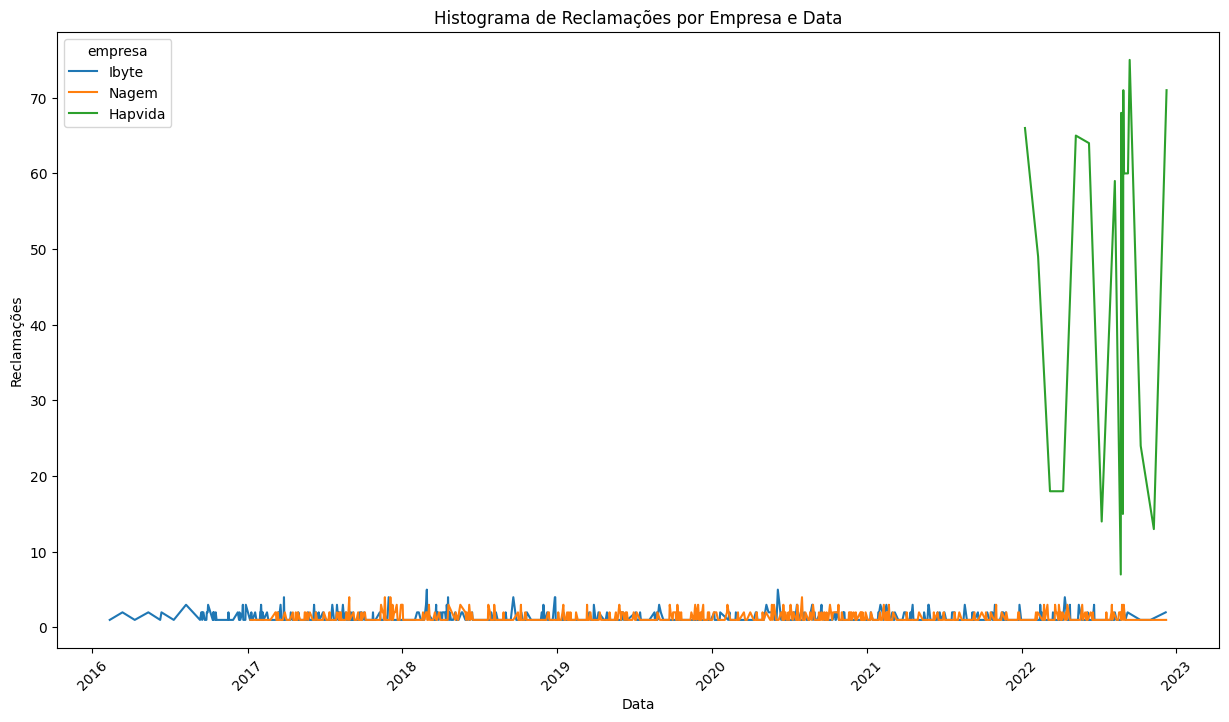

In [22]:
serie_temporal = df.groupby([df['TEMPO'], 'empresa']).size().reset_index(name='reclamacoes')
print(serie_temporal)
# import hvplot.pandas
# serie_temporal.hvplot.line(x='TEMPO', y='reclamacoes', by='empresa', xlabel='Data', ylabel='Reclamações', title='Histograma de Reclamações por Empresa e Data', rot=45, height=400, width=800)

# faz o mesmo gráfico, mas com matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.lineplot(data=serie_temporal, x='TEMPO', y='reclamacoes', hue='empresa')
plt.xticks(rotation=45)
plt.title('Histograma de Reclamações por Empresa e Data')
plt.xlabel('Data')
plt.ylabel('Reclamações')
plt.show()


# 2. Frequência de reclamações por estado. 

['PE' 'BA' 'GO' 'CE' 'SP' 'MA' 'PA' 'AL' 'RN' 'PB' 'MS' 'ES' 'AM' 'MT'
 'SE' 'MG' 'SA' 'RS' 'RR' 'RJ' 'SC' 'PI' 'TO' 'DF' 'PR' 'AP' 'IP' 'JU'
 'FO']


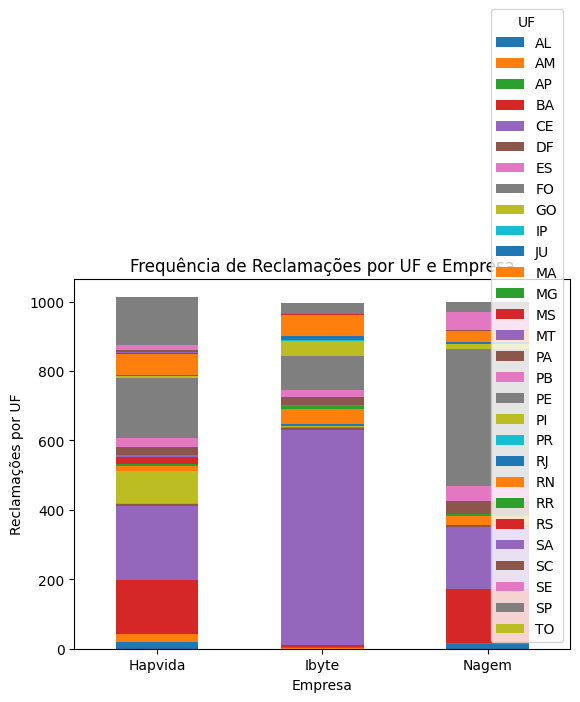

In [23]:
df_temp = df.groupby('empresa')['UF'].value_counts()
df_temp = df_temp.unstack().reset_index()
ufs = df['UF'].unique()
# remove nan values from ufs
ufs = ufs[~pd.isnull(ufs)]
print(ufs)
# df_temp.hvplot.bar(
#     x='empresa',
#     y=ufs,
#     stacked=True,
#     xlabel='Empresa',
#     ylabel='Reclamações por UF',
#     title='Frequência de Reclamações por UF e Empresa',
#     rot=0,
#     height=400,
#     width=800
#     )

# faz o mesmo gráfico com matplotlib
import matplotlib.pyplot as plt
df_temp.set_index('empresa').plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Empresa')
plt.ylabel('Reclamações por UF')
plt.title('Frequência de Reclamações por UF e Empresa')
plt.show()


# 3. Frequência de cada tipo de **STATUS**

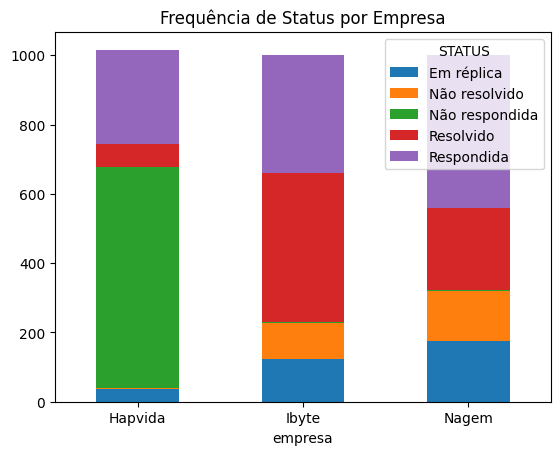

In [24]:
df_frequencia_status = df.groupby('empresa')['STATUS'].value_counts()
status_names = df['STATUS'].unique()
df_frequencia_status = df_frequencia_status.unstack().reset_index()
# df_frequencia_status.hvplot.bar(
#     x='empresa',
#     y=status_names,
#     stacked=True,
#     xlabel='Empresa',
#     ylabel='Frequência',
#     title='Frequência de Status por Empresa',
#     rot=0,
#     height=400,
#     width=800)

# faz o mesmo de cima com matplotlib
import matplotlib.pyplot as plt

df_frequencia_status.plot(kind='bar', x='empresa', stacked=True, rot=0, title='Frequência de Status por Empresa')
plt.show()


# 4. Distribuição do tamanho do texto (coluna **DESCRIÇÃO**) 

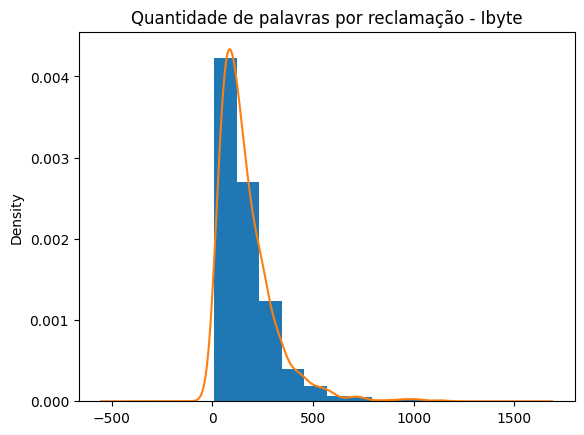

In [25]:
# crie uma funcao para calcular  a quantidade de palavrs de um texto
def conta_palavras(texto):
    return len(texto.split())

def plotar_histograma_por_empresa(empresa):
    df[df['empresa'] == empresa]['DESCRICAO'].apply(conta_palavras).plot(kind='hist', density=True, label=empresa, title=f'Quantidade de palavras por reclamação - {empresa}')
    df[df['empresa'] == empresa]['DESCRICAO'].apply(conta_palavras).plot.kde()

# plotar_histograma_por_empresa('Hapvida')
plotar_histograma_por_empresa('Ibyte')
# plotar_histograma_por_empresa('Nagem')